# **Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import os

# **Data Loading**

Pada tahapan Data Loading, saya melakukan setup untuk melakukan download dataset melalui kaggle dan menentukan lokasi penyimpanan dataset di google drive

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle-expert.json to kaggle-expert.json


{'kaggle-expert.json': b'{"username":"raihanakbar354","key":"af28f4fac67c86be36458a7955eea1de"}'}

In [ ]:
# Buat direktori .kaggle jika belum ada
kaggle_dir = "/root/.kaggle"
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Pindahkan file kaggle.json
!mv /content/kaggle-expert.json $kaggle_dir/kaggle.json

# Berikan izin yang sesuai pada file kaggle.json
!chmod 600 $kaggle_dir/kaggle.json

In [ ]:
# Lokasi folder di Google Drive tempat menyimpan dataset
DATASET_PATH="/content/drive/MyDrive/Dataset/ford-car-price-prediction"

# Buat folder di Google Drive jika belum ada
!mkdir -p $DATASET_PATH

# Download dataset dari Kaggle
!kaggle datasets download -d adhurimquku/ford-car-price-prediction -p $DATASET_PATH

# Ekstrak dataset langsung ke Google Drive
!unzip $DATASET_PATH/ford-car-price-prediction.zip -d $DATASET_PATH

# Hapus file ZIP setelah ekstraksi
!rm $DATASET_PATH/ford-car-price-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction
License(s): CC0-1.0
Archive:  /content/drive/MyDrive/Dataset/ford-car-price-prediction/ford-car-price-prediction.zip
  inflating: /content/drive/MyDrive/Dataset/ford-car-price-prediction/ford.csv  


Setelah berhasil di download, saya mendeklarasi kan variabel lokasi dataset. Dengan menggunakan fungsi **pd.read_csv()** saya mencoba untuk membaca data dari file dengan format Comma Separated Values (CSV) dan mengubahnya menjadi sebuah objek DataFrame. Informasi yang didapatkan berupa jumlah **data 17.966 row dan 9 column**

In [2]:
dataset = "/content/drive/MyDrive/Dataset/ford-car-price-prediction/ford.csv"
df = pd.read_csv(dataset)

df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


# **Data Understanding**

## **Exploratory Data Analysis - Deskripsi Variabel**

Langkah selajutnya melakukan EDA dengan memahami masing-masing deskripsi variabel. Dengan menggunakan **df.info()** saya ingin mengetahui masing-masing data pada setiap column dan tipe datanya.

1. **model** -> Kolom ini berisi berbagai model atau jenis mobil yang diproduksi oleh merek Ford.

2. **year** -> Kolom ini menunjukkan tahun kapan mobil tersebut diproduksi atau dibuat. Informasi ini penting untuk mengetahui usia mobil.

3. **price** -> Kolom ini mencantumkan harga jual mobil dalam mata uang Dollar Amerika Serikat.

4. **transmission** -> Kolom ini mengindikasikan jenis sistem transmisi yang digunakan oleh mobil. Terdapat tiga pilihan, Automatic, Manual, Semi-Auto

5. **mileage** -> Jumlah Mil yang Telah Ditempuh: Kolom ini mencatat total jarak yang telah ditempuh oleh mobil, diukur dalam satuan mil. Ini sering menjadi indikator seberapa sering dan jauh mobil telah digunakan.

6. **fuel_Type** -> Kolom ini menjelaskan jenis bahan bakar yang digunakan oleh mobil, Petrol, Diesel, Hybrid, Electric, Other

7. **tax** -> Kolom ini menunjukkan besaran pajak tahunan yang harus dibayarkan untuk mobil tersebut.

8. **mpg** -> Kolom ini mengukur efisiensi bahan bakar mobil, yaitu seberapa jauh mobil dapat menempuh perjalanan (dalam mil) dengan satu galon bahan bakar. Angka yang lebih tinggi menunjukkan mobil yang lebih hemat bahan bakar.

9. **engineSize** -> Kolom ini menunjukkan kapasitas atau ukuran mesin mobil, biasanya diukur dalam liter (L).

Semua kolom memiliki **17.966 nilai non-null**, menandakan tidak ada data yang hilang.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


**df.describe()** memberikan gambaran sekilas tentang distribusi dan karakteristik data numerik dalam DataFrame. Perbedaan signifikan antara nilai minimum/maksimum dan kuartil (25%, 50%, 75%) dapat mengindikasikan adanya outlier dalam data.

In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


## **Exploratory Data Analysis - Univariate Analysis**

Tahap selanjutnya dalam proses EDA yaitu melakukan Univariate Analysis yaitu teknik analisis data yang fokus pada pemeriksaan dan deskripsi satu variabel tunggal pada suatu waktu. Pada tahapan ini akan dibagi menjadi dua fitur yaitu numerical features dan categorical features.

In [5]:
num_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
cat_features = ['model', 'transmission', 'fuelType']

### **Categorical Features**

Berdasarkan output yang dihasilkan didapati bahwa model **Fiesta** menjadi model yang paling banyak terjual dengan total 6.557 dan disusul model **Focus** dengan 4.588 dan model **Kuga** dengan 2.225. Selain itu juga banyak model lain yang terjual namun tidak sebanyak 3 model mobil sebelumnya.

                        jumlah sampel  persentase
model                                            
 Fiesta                          6557        36.5
 Focus                           4588        25.5
 Kuga                            2225        12.4
 EcoSport                        1143         6.4
 C-MAX                            543         3.0
 Ka+                              531         3.0
 Mondeo                           526         2.9
 B-MAX                            355         2.0
 S-MAX                            296         1.6
 Grand C-MAX                      247         1.4
 Galaxy                           228         1.3
 Edge                             208         1.2
 KA                               199         1.1
 Puma                              80         0.4
 Tourneo Custom                    69         0.4
 Grand Tourneo Connect             59         0.3
 Mustang                           57         0.3
 Tourneo Connect                   33         0.2


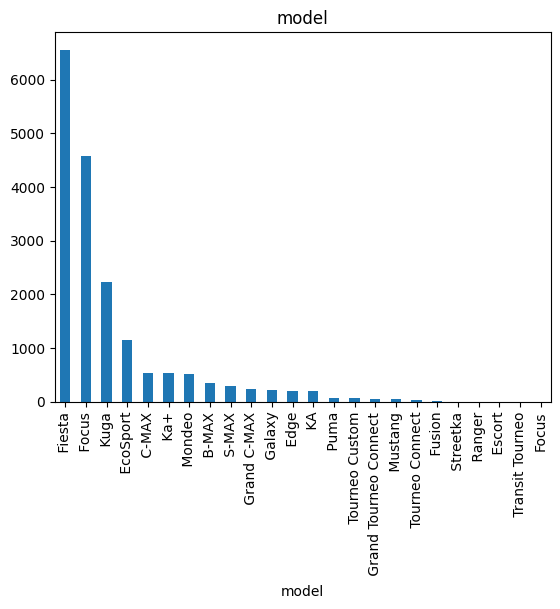

In [6]:
feature = cat_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
model = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(model)
count.plot(kind='bar', title=feature);

Berdasarkan output yang dihasilkan transmission yang paling banyak adalah Manual dengan 86% dari total data yang ada. Hal ini menunjukkan model mobil dengan transmission Manual merupakan model yang paling laku dipasaran

              jumlah sampel  persentase
transmission                           
Manual                15518        86.4
Automatic              1361         7.6
Semi-Auto              1087         6.1


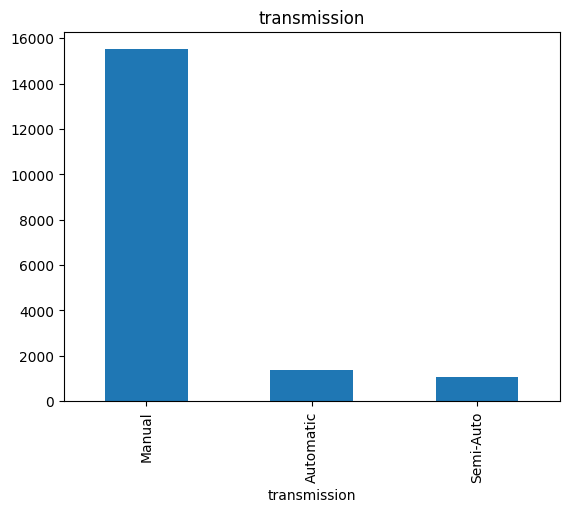

In [7]:
feature = cat_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
transmission = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(transmission)
count.plot(kind='bar', title=feature);

Berdasarkan output dibawah ini dari sisi tipe bahan bakar yang banyak digunakan, Petrol mendominasi dengan 12.179 dan disusul oleh Diesel dengan 5.762. Kedua tipe ini lebih dominan dibandingkan dengan tipe lain seperti Hybrid dan Electric. Hal ini menunjukkan bahwa pada masa itu kendaraan listrik belum begitu populer di kalangan masyarakat.

          jumlah sampel  persentase
fuelType                           
Petrol            12179        67.8
Diesel             5762        32.1
Hybrid               22         0.1
Electric              2         0.0
Other                 1         0.0


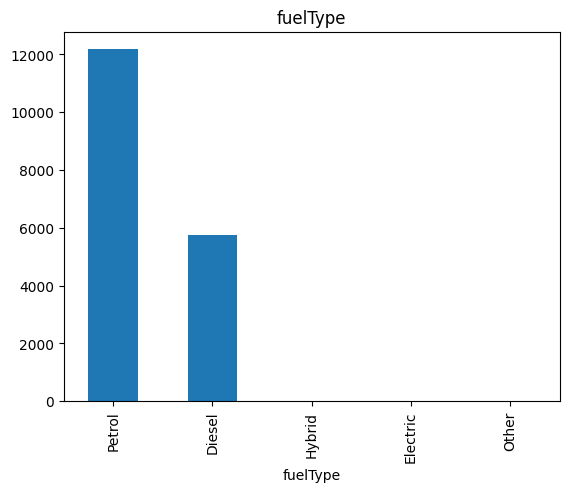

In [8]:
feature = cat_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
event_type = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(event_type)
count.plot(kind='bar', title=feature);

### **Numerical Features**

Berikut ini penjelasan masing-masing histogram:
1. Sebagian besar mobil dalam dataset ini diproduksi antara tahun 2016 dan 2019, dengan tahun 2017 menjadi tahun produksi terbanyak. Jumlah mobil dari tahun-tahun yang lebih tua atau lebih baru cenderung lebih sedikit dalam dataset ini.
2. Sebagian besar mobil dalam dataset ini memiliki harga di kisaran yang lebih rendah, dengan sejumlah kecil mobil yang memiliki harga premium atau mewah.
3. Sebagian besar mobil dalam dataset ini memiliki jarak tempuh yang relatif rendah, menunjukkan bahwa banyak mobil mungkin masih relatif baru atau tidak terlalu sering digunakan.
4. Sistem atau aturan perpajakan untuk mobil-mobil ini kemungkinan memiliki beberapa tingkatan atau kelompok tarif pajak yang berbeda, menyebabkan konsentrasi jumlah mobil pada nilai-nilai pajak tertentu.
5. Penggunaan bahan bakar mobil dalam dataset ini terkumpul di beberapa rentang tertentu, menunjukkan adanya berbagai jenis transmission yang menghasilkan tingkat efisiensi yang berbeda. Puncak di sekitar 60-65 mpg menunjukkan rentang efisiensi yang paling umum.
6. Ukuran mesin mobil dalam dataset ini terkonsentrasi pada beberapa nilai tertentu, terutama 1.0, diikuti oleh 1.6 dan 2.0. Ukuran mesin lainnya kurang umum dalam dataset ini.

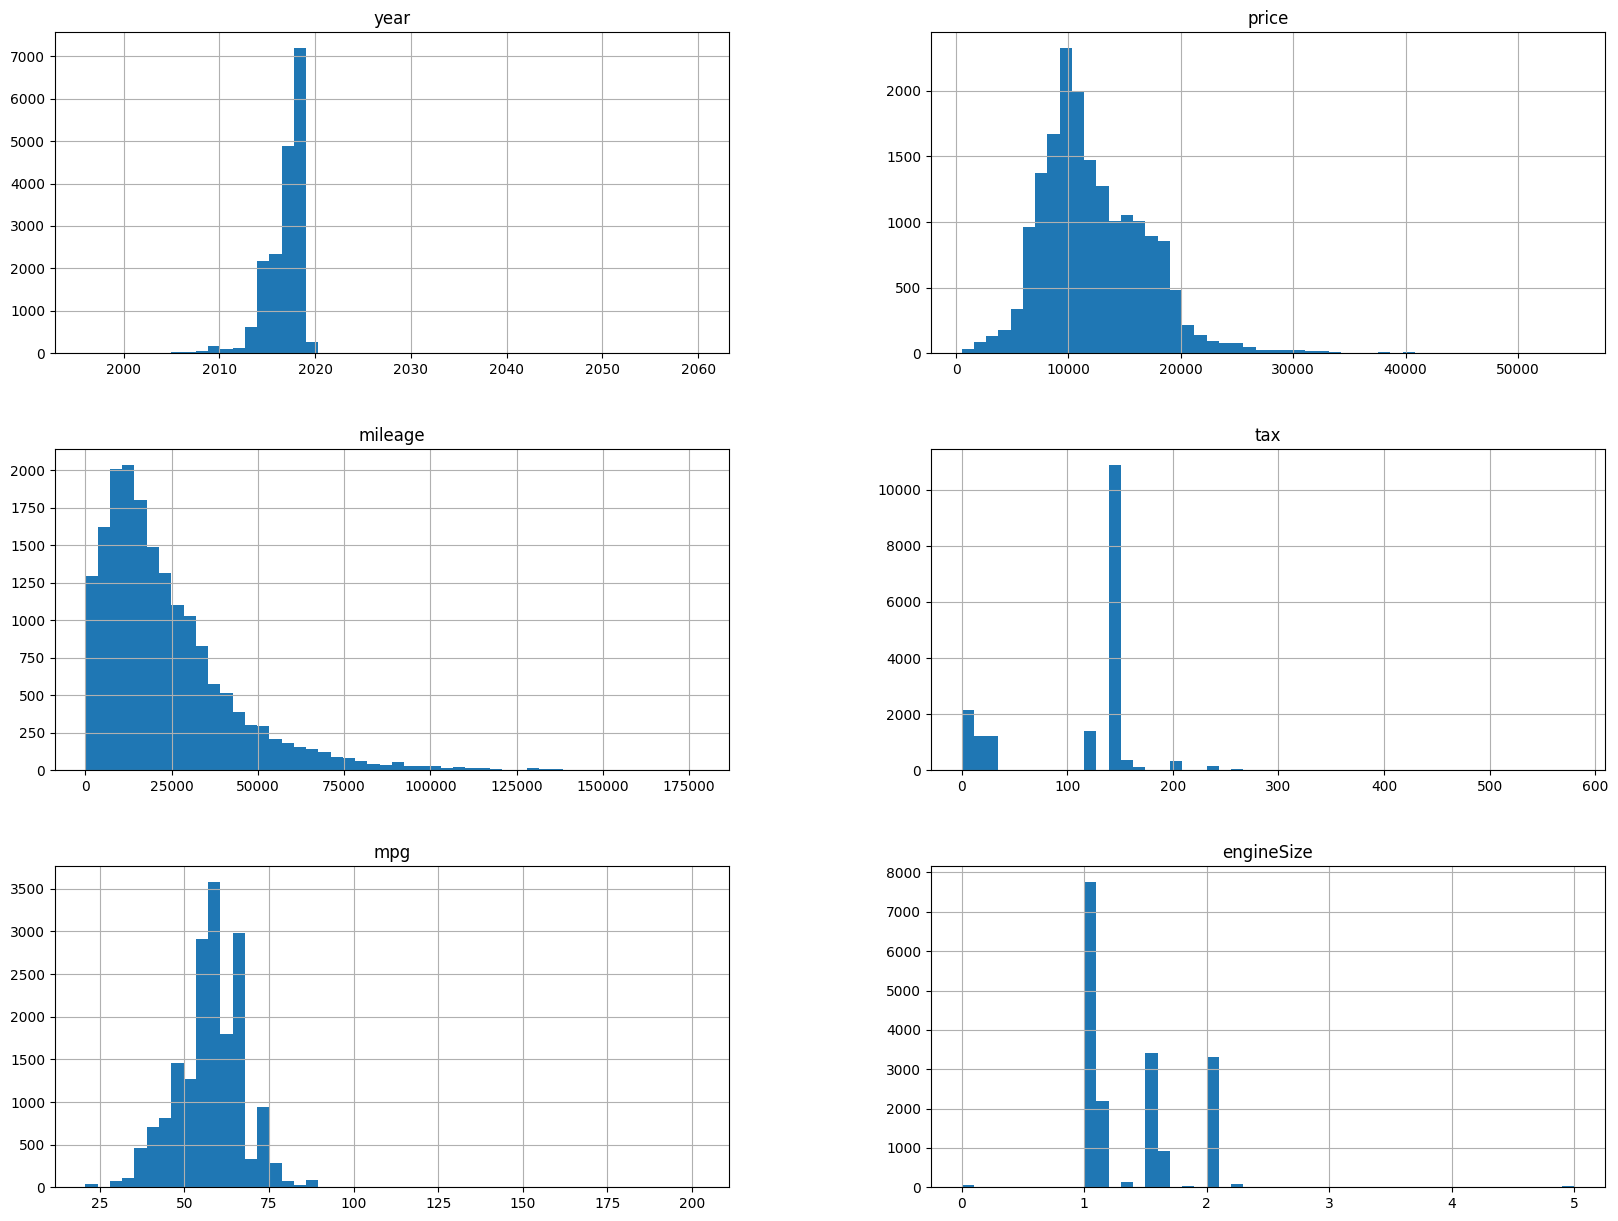

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# **Exploratory Data Analysis - Multivariate Analysis**

## **Categorical Features**

Gambar ini menampilkan tiga buah bar plot yang memvisualisasikan rata-rata harga (price) mobil Ford berdasarkan tiga variabel kategorikal yang berbeda, model, transmission, dan fuelType. Berikut ini detail penjelasannya:

---

**1. Rata-rata harga berdasarkan model mobil**
*   Beberapa model seperti Edge, Tourneo Custom, dan Galaxy cenderung memiliki rata-rata harga yang jauh lebih tinggi dibandingkan model lain seperti KA, Fiesta, dan Focus.

*   Model seperti Puma, Kuga, Mondeo, S-MAX, B-MAX, Tourneo Connect, dan Grand C-MAX berada di kisaran harga menengah.

---

**2. Rata-rata Harga Berdasarkan Jenis Transmisi**
*   Mobil dengan transmisi Automatic cenderung memiliki rata-rata harga yang lebih tinggi dibandingkan mobil dengan transmisi Manual.
*   Mobil dengan transmisi Semi-Auto memiliki rata-rata harga yang paling tinggi di antara ketiganya.

---

**3. Rata-rata Harga Berdasarkan Jenis Bahan Bakar**
*   Mobil dengan bahan bakar Hybrid memiliki rata-rata harga yang paling tinggi secara signifikan dibandingkan jenis bahan bakar lainnya dalam dataset ini.
*   Mobil dengan bahan bakar Electric juga memiliki rata-rata harga yang cukup tinggi, meskipun sedikit di bawah Hybrid.
*   Mobil dengan bahan bakar Petrol dan Diesel memiliki rata-rata harga yang relatif mirip dan lebih rendah dibandingkan Hybrid dan Electric.

---






<ipython-input-10-0fe0314185f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-10-0fe0314185f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-10-0fe0314185f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")


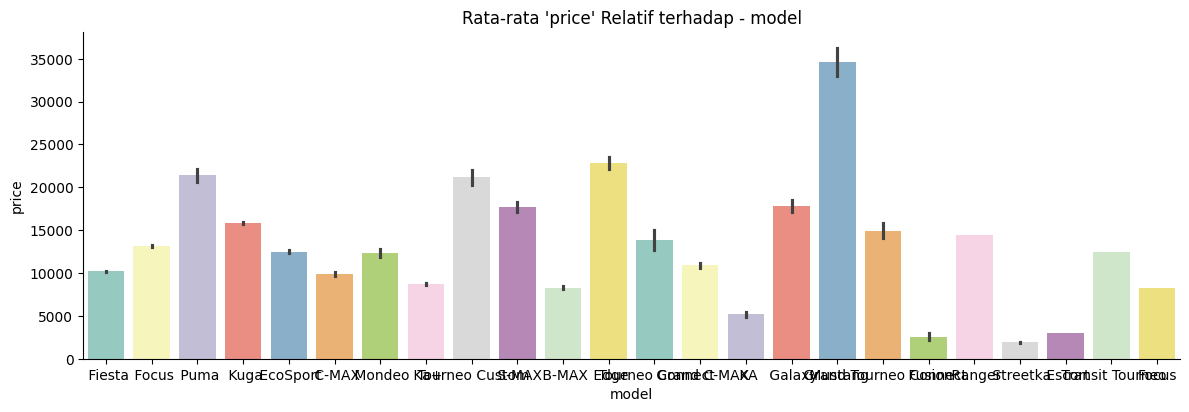

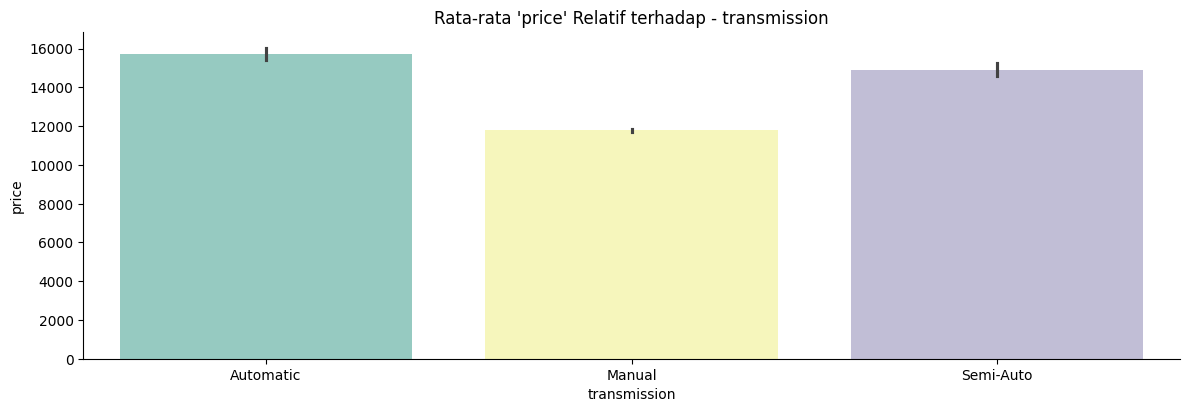

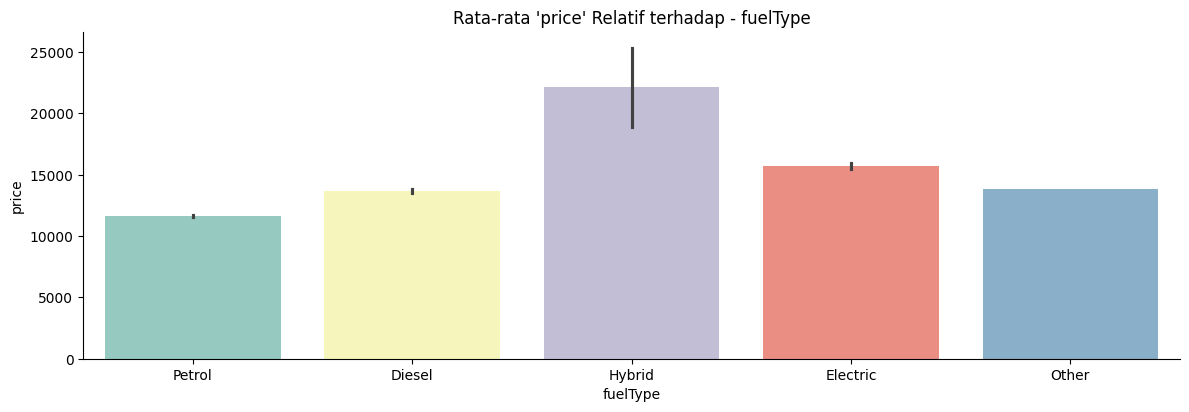

In [10]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

## **Numerical Features**

Gambar ini menampilkan sebuah pair plot yang dibuat menggunakan library seaborn. Pair plot sangat berguna untuk memvisualisasikan hubungan antara pasangan variabel numerik dalam sebuah dataset. Dalam kasus ini,variabel - variabel numerik yang dianalisis adalah 'year', 'price', 'mileage', dan 'tax', mpg, dan engineSize.

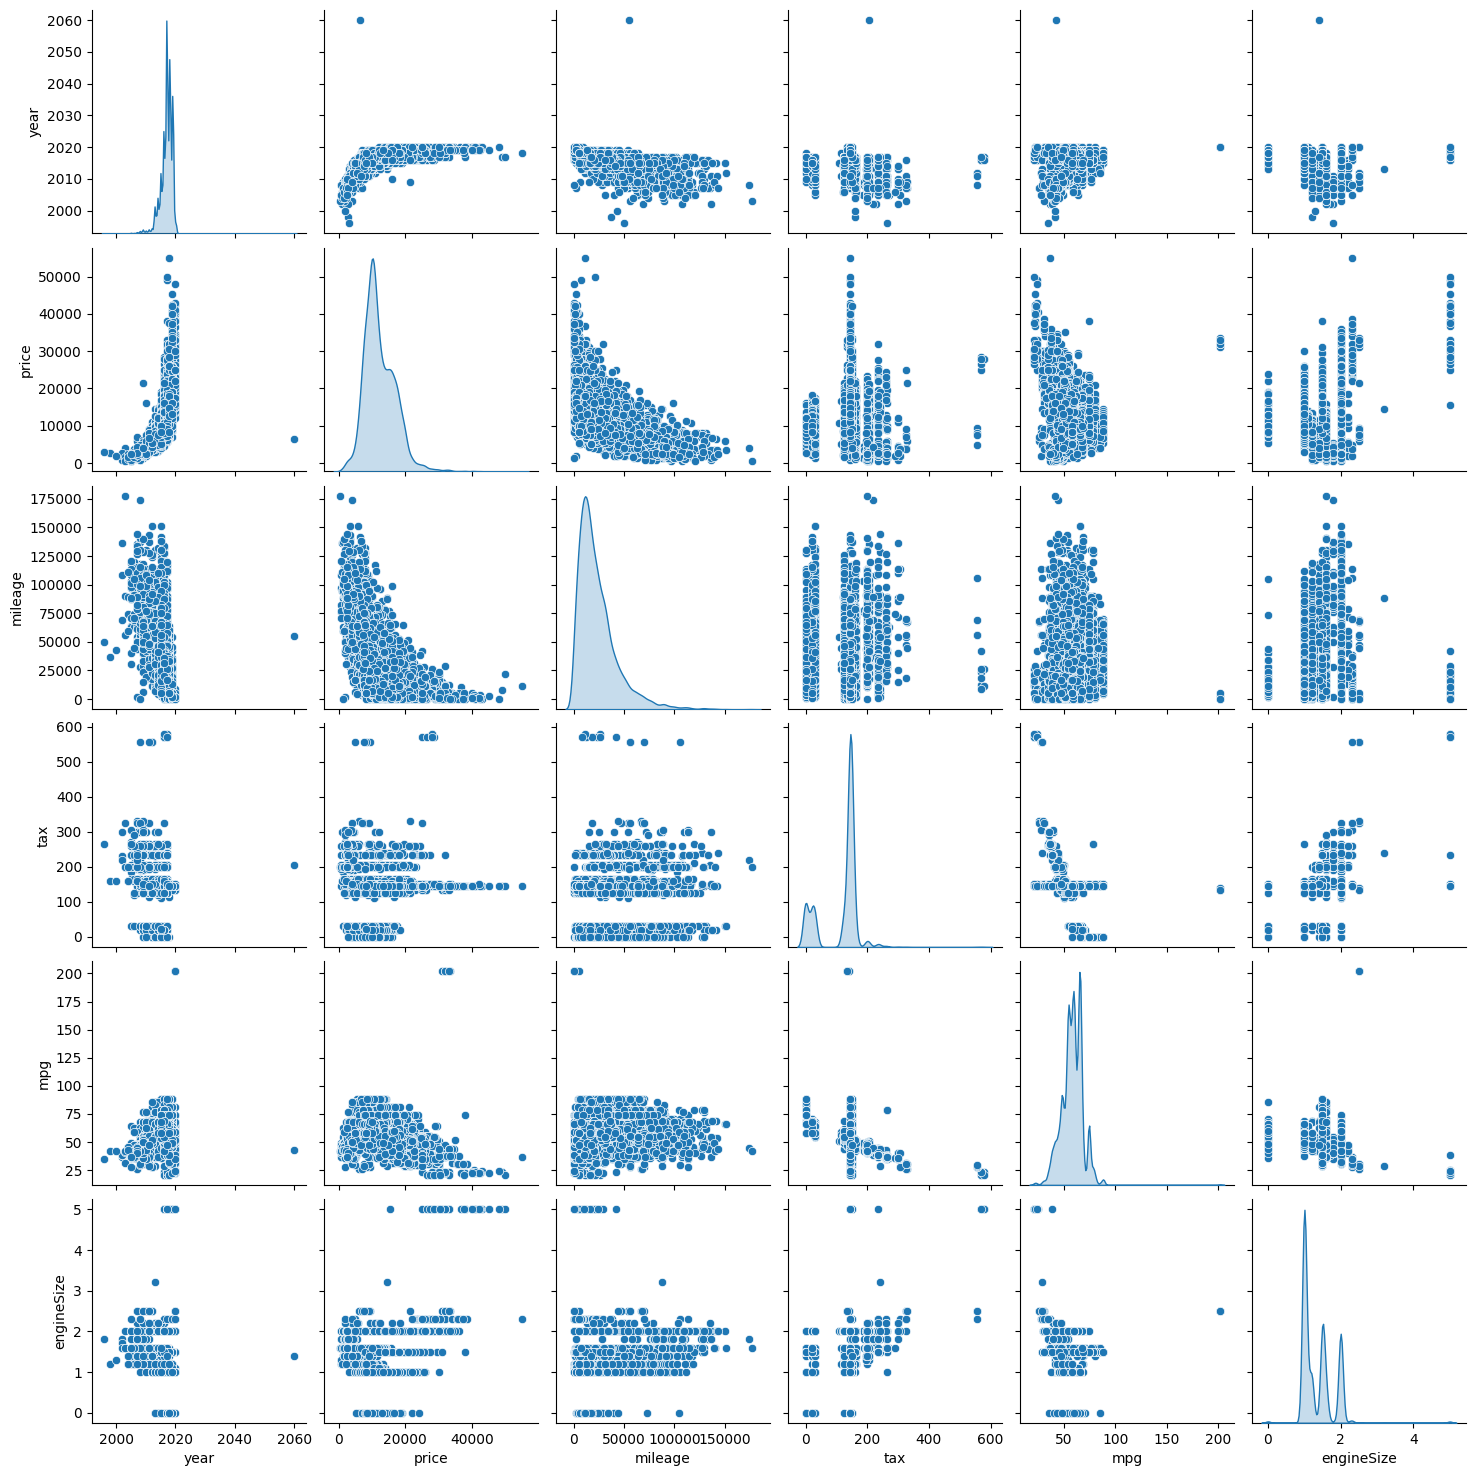

In [11]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Gambar dibawah ini menampilkan sebuah Correlation Matrix (Matriks Korelasi) yang divisualisasikan menggunakan heatmap. Matriks ini menunjukkan koefisien korelasi antara pasangan fitur-fitur numerik dalam dataset mobil. Beberapa fitur menunjukkan korelasi yang cukup kuat (misalnya, tahun dengan harga dan jarak tempuh), sementara yang lain memiliki korelasi yang lemah.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

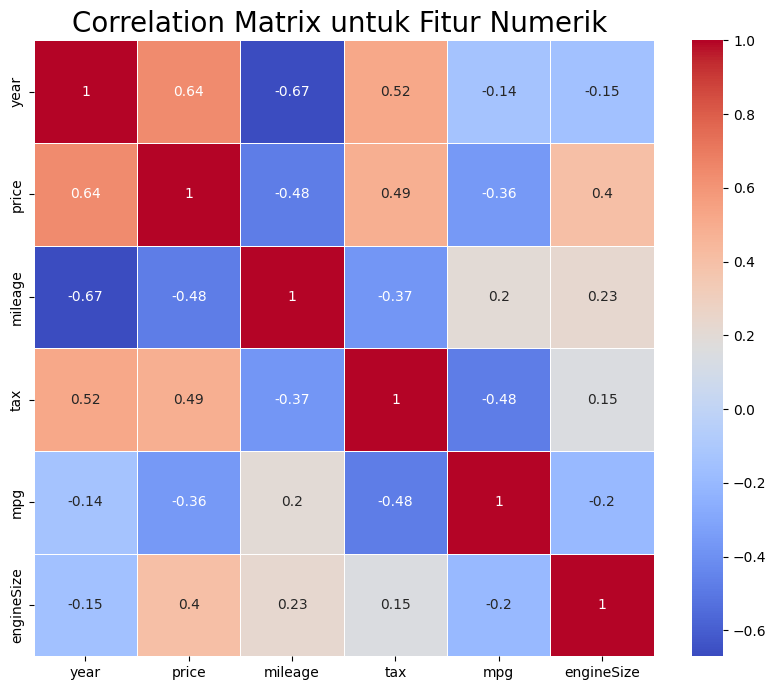

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [12]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


# **Data Preparation**

## **Penanganan Outlier**

Output dibawah ini merupakan sebuah boxplot yang menampilkan distribusi harga mobil (price) dari dataset. Dapat dilihat bahwa sebagian besar harga berada dalam rentang 0-25000, namun ada sejumlah mobil dengan harga yang jauh lebih tinggi yang berperan sebagai *outlier* dan menyebabkan distribusi harga menjadi miring ke kanan.

<Axes: xlabel='price'>

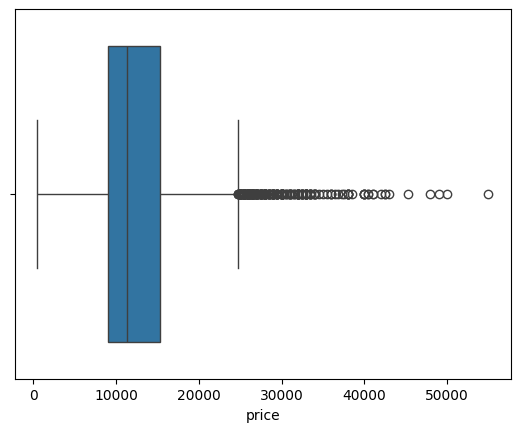

In [13]:
sns.boxplot(x=df['price'])

Output dibawah ini merupakan sebuah boxplot yang menampilkan distribusi jarak tempuh mobil (milage) dari dataset. Dapat dilihat bahwa sebagian besar distribusi jarak tempuh berada dalam rentang 0-60000, namun ada sejumlah mobil dengan jarak tempuh yang jauh lebih tinggi yang berperan sebagai *outlier* dan menyebabkan distribusi jarak tempuh mobil menjadi miring ke kanan.

<Axes: xlabel='mileage'>

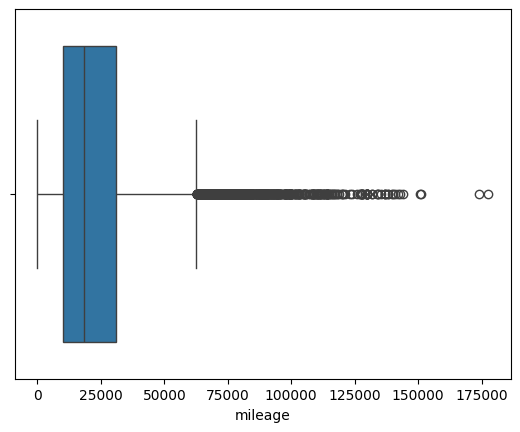

In [14]:
sns.boxplot(x=df['mileage'])

Output dibawah ini merupakan sebuah boxplot yang menampilkan distribusi pajak mobil (tax) dari dataset. Dapat dilihat bahwa sebagian besar distribusi pajak berada dalam rentang 0-120, namun ada sejumlah mobil dengan pajak yang jauh lebih tinggi yang berperan sebagai *outlier* dan menyebabkan distribusi pajak mobil menjadi miring ke kanan.

<Axes: xlabel='tax'>

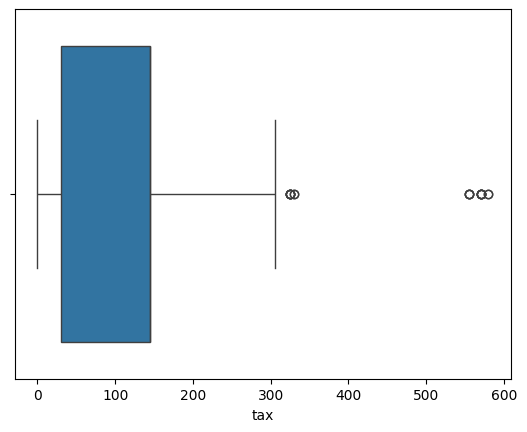

In [15]:
sns.boxplot(x=df['tax'])

Output dibawah ini merupakan sebuah boxplot yang menampilkan distribusi penggunaan bahan bakar mobil (mpg) dari dataset. Dapat dilihat bahwa sebagian besar penggunaan bahan bakar berada dalam rentang 25-80, namun ada sejumlah mobil dengan penggunaan yang jauh lebih rendah yang berperan sebagai *outlier* dan menyebabkan distribusi penggunaan bahan bakar mobil menjadi miring ke kiri.

<Axes: xlabel='mpg'>

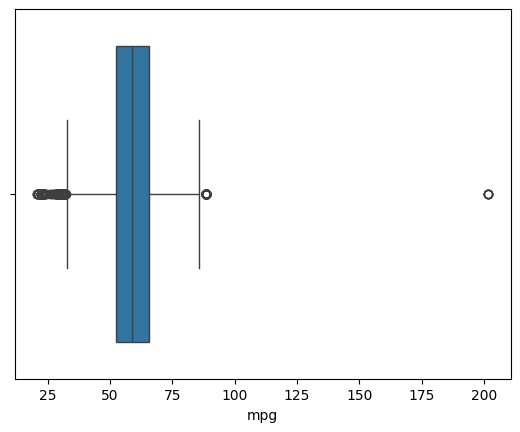

In [16]:
sns.boxplot(x=df['mpg'])

Output dibawah ini merupakan sebuah boxplot yang memberikan visualisasi distribusi ukuran mesin mobil pada dataset. Sebagian besar mobil memiliki ukuran mesin antara 1.0 dan 2.0 liter, dengan distribusi yang cukup merata di rentang tersebut. Namun, terdapat beberapa outlier yang menunjukkan adanya mobil dengan ukuran mesin yang jauh lebih kecil dan jauh lebih besar dibandingkan dengan mayoritas.

<Axes: xlabel='engineSize'>

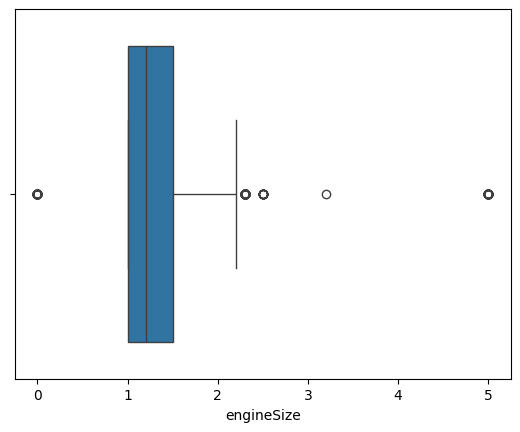

In [17]:
sns.boxplot(x=df['engineSize'])

Pada kode dibawah ini saya melakukan identifikasi outlier dengan menggunakan metode IQR (Interquartile Range) pada kolom-kolom numerik dalam DataFrame dan kemudian menghapus seluruh baris yang mengandung outlier pada salah satu kolom numerik tersebut. Setelah menghapus data yang mengandung outlier, data tersisa 16.448 data.

In [18]:
# Identifikasi kolom-kolom numerik yang ingin dianalisis outliernya
numeric_cols = df.select_dtypes(include=['number']).columns

if not numeric_cols.empty:
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Membuat boolean mask untuk mengidentifikasi baris yang berada dalam batas IQR
    within_bounds = ~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)

    # Memfilter DataFrame untuk hanya menyertakan baris yang berada dalam batas IQR
    df = df[within_bounds]
else:
    print("Tidak ada kolom numerik yang ditemukan dalam DataFrame 'df'.")
    # Atau Anda bisa memberikan penanganan kesalahan lain sesuai kebutuhan

# Cek ukuran dataset setelah kita drop outliers
df.shape

(16448, 9)

## **Pengecekan Missing Value**

In [19]:
# Cek missing value per kolom
missing_values_count = df.isnull().sum()
print("Jumlah missing value per kolom:\n", missing_values_count)

# Cek total missing value dalam seluruh DataFrame
total_missing = df.isnull().sum().sum()
print("\nTotal missing value dalam DataFrame:", total_missing)

Jumlah missing value per kolom:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Total missing value dalam DataFrame: 0


## **Encoding Fitur Kategori**

***One-hot encoding*** adalah teknik yang umum digunakan untuk mengubah data kategorikal menjadi format numerik yang dapat dipahami oleh sebagian besar algoritma machine learning. Setiap kategori dalam sebuah fitur kategorikal diubah menjadi kolom biner (0 atau 1). Ini mencegah algoritma mengasumsikan adanya urutan atau jarak antara kategori (seperti yang mungkin terjadi jika kita hanya memberikan label numerik pada kategori).

In [20]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['model'], prefix='model')],axis=1)
df = pd.concat([df, pd.get_dummies(df['transmission'], prefix='transmission')],axis=1)
df = pd.concat([df, pd.get_dummies(df['fuelType'], prefix='fuelType')],axis=1)
df.drop(['model','transmission','fuelType'], axis=1, inplace=True)
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2018,14000,9083,150,57.7,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2017,13000,12456,150,57.7,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,2019,17500,10460,145,40.3,1.5,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,2019,16500,1482,145,48.7,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


## **Train-Test-Split**

Kode ini memisahkan dataset menjadi fitur (X) yang berisi semua kolom kecuali 'price', dan target (y) yang hanya berisi kolom 'price'. Selanjutnya, fungsi train_test_split membagi data ini menjadi set pelatihan (80% untuk X_train dan y_train) yang akan digunakan untuk melatih model, dan set pengujian (20% untuk X_test dan y_test) yang akan digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat, dengan random_state=123 memastikan pembagian data yang konsisten untuk reproduktibilitas.

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(["price"],axis =1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 16448
Total # of sample in train dataset: 13158
Total # of sample in test dataset: 3290


## **Standarisasi**

Kode ini bertujuan untuk melakukan standardisasi pada fitur-fitur numerik tertentu ('year', 'mileage', 'tax', 'mpg', 'engineSize') dalam set pelatihan (X_train). Standardisasi dilakukan menggunakan StandardScaler dari scikit-learn, yang menghitung mean dan standar deviasi dari setiap fitur numerik dalam X_train, kemudian mentransformasikan nilai-nilai fitur tersebut sehingga memiliki mean mendekati nol dan standar deviasi mendekati satu. Proses ini penting untuk memastikan bahwa fitur-fitur numerik dengan skala yang berbeda tidak memberikan pengaruh yang tidak proporsional pada model machine learning dan dapat membantu algoritma konvergen lebih cepat.

In [22]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year,mileage,tax,mpg,engineSize
9590,0.574323,-0.199470,0.536627,-0.052929,-0.308373
16350,1.228264,-0.971272,0.536627,0.838794,-0.840166
7142,0.574323,-0.217805,0.536627,-0.431911,-0.840166
8666,-0.733559,0.900891,-1.919245,1.797396,0.489315
12869,-0.079618,0.620103,0.197886,-0.755160,-0.840166


In [23]:
X_train[numerical_features].describe().round(4)

,year,mileage,tax,mpg,engineSize
count,13158.0000,13158.0000,13158.0000,13158.0000,13158.0000
mean,-0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.6954,-1.4816,-1.9192,-2.8619,-0.8402
25%,-0.7336,-0.7644,0.1979,-0.5434,-0.8402
50%,-0.0796,-0.2154,0.5366,0.0808,-0.5743
75%,0.5743,0.6236,0.5366,0.8388,0.4893
max,1.8822,3.0937,3.1619,3.0570,2.3506


# **Model Development**

Kode ini bertujuan untuk menginisialisasi sebuah DataFrame pandas bernama models yang akan digunakan untuk menyimpan dan membandingkan metrik evaluasi performa dari berbagai model regresi yang berbeda. DataFrame ini memiliki dua baris, 'train_mse' (Mean Squared Error pada set pelatihan) dan 'test_mse' (Mean Squared Error pada set pengujian), serta enam kolom yang masing-masing akan menampung hasil evaluasi untuk model K-Nearest Neighbors (KNN), Random Forest (RF), Gradient Boosting ('Boosting'), Linear Regression (LR), XGBoost (XGB), dan LightGBM (LGBM). Dengan DataFrame ini, hasil evaluasi dari setiap model dapat disimpan dan dibandingkan secara terstruktur.

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RF', 'Boosting', 'LR', 'XGB', 'LGBM'])

## **KNN**

In [25]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

# **Random Forest**

In [26]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RF'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## **AdaBoost**

In [27]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.001, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## **Linear Regression**

In [28]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
models.loc['train_mse', 'LR'] = mean_squared_error(y_pred=LR.predict(X_train), y_true=y_train)

## **XGBoost**

In [29]:
from xgboost import XGBRegressor

XGB = XGBRegressor()
XGB.fit(X_train, y_train)

models.loc['train_mse','XGB'] = mean_squared_error(y_pred=XGB.predict(X_train), y_true=y_train)

## **LightGBM**

In [30]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor()
LGBM.fit(X_train, y_train)

models.loc['train_mse','LGBM'] = mean_squared_error(y_pred=LGBM.predict(X_train), y_true=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 13158, number of used features: 27
[LightGBM] [Info] Start training from score 12383.560572


## **Evaluasi Model**

Kode ini bertujuan untuk menerapkan standardisasi yang telah dipelajari dari data pelatihan (X_train) ke fitur-fitur numerik dalam set pengujian (X_test). Dengan menggunakan objek scaler yang sebelumnya telah di-fit pada X_train, kode ini mentransformasikan nilai-nilai fitur numerik di X_test sehingga memiliki skala yang serupa dengan data pelatihan (rata-rata mendekati nol dan varians mendekati satu).

In [31]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-31-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.57432301  0.57432301 -1.38749999 ... -2.695382   -2.041441
  1.22826402]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
<ipython-input-31-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.07335561  0.19643774  1.12521477 ...  0.83310471 -0.40494812
 -0.74044736]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
<ipython-input-31-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.53662683  0.62131206  1.55284958 ... -1

In [32]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting', 'LR', 'XGB', 'LGBM'])

# Siapkan dataframe untuk nilai R-squared
r_squared = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting', 'LR', 'XGB', 'LGBM'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting, 'LR': LR, 'XGB': XGB, 'LGBM': LGBM}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

    # Hitung R-squared
    r_squared.loc[name, 'train'] = r2_score(y_true=y_train, y_pred=model.predict(X_train))
    r_squared.loc[name, 'test'] = r2_score(y_true=y_test, y_pred=model.predict(X_test))

Berdasarkan nilai MSE pada data pengujian:

Performa Terbaik (MSE Terendah): XGBoost dan LGBM menunjukkan performa terbaik dalam melakukan generalisasi ke data yang belum pernah dilihat.
Overfitting Signifikan: KNN dan Random Forest mengalami overfitting yang cukup besar, di mana performa pada data pelatihan jauh lebih baik daripada pada data pengujian.
Potensi Underfitting atau Model Sederhana: Boosting dan Linear Regression memiliki nilai MSE yang lebih tinggi secara keseluruhan, yang mungkin mengindikasikan bahwa model tersebut tidak cukup kompleks untuk menangkap pola dalam data dengan baik.

In [33]:
# Panggil mse
mse

,train,test
KNN,1006.284806,1143.792333
RF,426.718751,1167.763192
Boosting,5042.215589,4926.830749
LR,2330.317034,2286.872309
XGB,731.685875,1048.017063
LGBM,975.905295,1056.927994


Berdasarkan nilai R² pada data pengujian:

Performa Terbaik (R² Tertinggi): XGBoost dan LGBM menunjukkan performa terbaik dalam menjelaskan varians harga pada data yang belum pernah dilihat. Random Forest juga sangat baik.
Generalisasi Baik: Sebagian besar model menunjukkan generalisasi yang cukup baik karena nilai R² pada data pengujian tidak jauh berbeda dari nilai pada data pelatihan.
Performa Lebih Rendah: Boosting dan Linear Regression memiliki nilai R² yang lebih rendah dibandingkan model lainnya, menunjukkan bahwa mereka tidak menjelaskan varians dalam harga sebaik model-model tree-based atau berbasis tetangga.

Secara keseluruhan, berdasarkan metrik R², model XGBoost, LightGBM, dan Random Forest tampaknya menjadi pilihan terbaik untuk memprediksi harga mobil dalam dataset ini. Mereka mampu menjelaskan sebagian besar varians dalam harga dan menunjukkan kemampuan generalisasi yang baik.

In [34]:
# Panggil mse
r_squared

,train,test
KNN,0.935522,0.927869
RF,0.972658,0.926358
Boosting,0.67692,0.689301
LR,0.850685,0.855784
XGB,0.953117,0.933909
LGBM,0.937469,0.933347


Kesimpulan:

Model Terbaik (MSE Terendah pada Test Set): Berdasarkan visualisasi ini, LGBM dan XGBoost menunjukkan performa terbaik dalam melakukan generalisasi ke data yang belum pernah dilihat (MSE terendah pada batang oranye).
Overfitting: Random Forest (RF) menunjukkan overfitting yang jelas karena MSE pada data pelatihan sangat rendah, tetapi meningkat tajam pada data pengujian. KNN juga menunjukkan indikasi overfitting.

Performa Kurang Baik: Boosting dan Linear Regression (LR) memiliki performa prediksi yang kurang baik secara keseluruhan (MSE tinggi pada test set).
Untuk tugas regresi ini, LGBM dan XGBoost tampaknya menjadi pilihan model yang lebih baik karena memiliki MSE yang rendah pada data pengujian dan menunjukkan generalisasi yang baik (perbedaan kecil antara train dan test MSE).

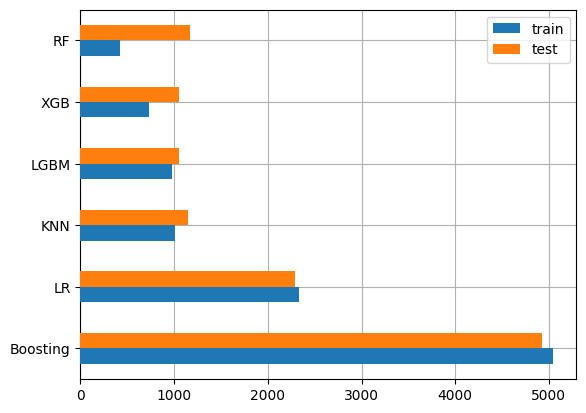

In [35]:
fig, ax = plt.subplots()
mse.sort_values(by='train', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [36]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_LR,prediksi_XGB,prediksi_LGBM
5821,11491,11545.6,12124.0,11394.0,13208.1,12554.400391,12578.4
